In [1]:
import os,sys
sys.path.append('./../../../open_AR_Sandbox/')
sys.path.append('./../../../gempy-1.16/')
import sandbox.sandbox as sb
import matplotlib.pyplot as plt 
import numpy
import numpy as np
import pandas as pd
import pykinect2
import panel as pn
import matplotlib
pn.extension()
from bokeh.plotting import figure, show, output_file
import cv2 as cv
import cv2
from cv2 import aruco
import scipy.spatial.distance as cdist

Freenect module not found, KinectV1 will not work.


./../../../gempy-1.16\gempy\plotting\visualization.py:36: UserWarning: Steno 3D package is not installed. No 3D online visualization available.
  warnings.warn('Steno 3D package is not installed. No 3D online visualization available.')
./../../../gempy-1.16\gempy\posterior_analysis.py:24: UserWarning: pymc (v2) package is not installed. No support for stochastic simulation posterior analysis.
  warnings.warn("pymc (v2) package is not installed. No support for stochastic simulation posterior analysis.")
./../../../gempy-1.16\gempy\posterior_analysis.py:28: UserWarning: pymc (v3) package is not installed. No support for stochastic simulation posterior analysis.
  warnings.warn("pymc (v3) package is not installed. No support for stochastic simulation posterior analysis.")
./../../../open_AR_Sandbox\sandbox\sandbox.py:49: UserWarning: gempy not found, GeoMap Module will not work
  warn('gempy not found, GeoMap Module will not work')


In [2]:
calib = sb.CalibrationData(file = 'my_calibration.json')
sensor = sb.KinectV2(calib)

JSON configuration loaded.
KinectV2 initialized.


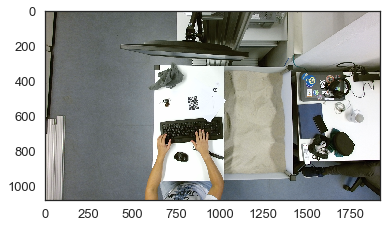

In [3]:
image = sensor.get_color()
plt.imshow(image)

In [ ]:
image = sensor.get_color()[300:1000,500:1500]
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
aruco_dict = aruco.Dictionary_get(aruco.DICT_4X4_50)
parameters = aruco.DetectorParameters_create()
corners, ids, rejectedImgPoints = aruco.detectMarkers(gray, aruco_dict, parameters=parameters)
image = aruco.drawDetectedMarkers(image, corners, ids)
image = aruco.drawDetectedMarkers(image, rejectedImgPoints, borderColor=(100, 0, 240))
plt.figure(figsize=(20,20))
plt.imshow(image.get())

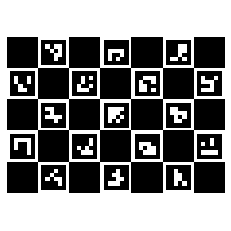

In [21]:
board = aruco.CharucoBoard_create(7, 5, 1, .8, aruco_dict)
imboard = board.draw((2000, 2000))
cv2.imwrite("Chessboard.tiff", imboard)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.imshow(imboard, cmap = plt.cm.gray, interpolation = "nearest")
ax.axis("off")
plt.show()
fig.savefig("ChharucoChessboard.pdf")

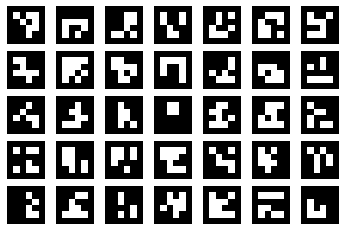

In [18]:
aruco_dict = aruco.Dictionary_get(aruco.DICT_4X4_50)

fig = plt.figure()
nx = 7
ny = 5
for i in range(1, nx*ny+1):
    ax = fig.add_subplot(ny,nx, i)
    img = aruco.drawMarker(aruco_dict,i-1, 700)
    plt.imshow(img, cmap = plt.cm.gray, interpolation = "nearest")
    ax.axis("off")

plt.savefig("Chessboard.pdf")
plt.show()
#plt.close()

In [33]:
n=150
images = []

fr = 100
for i in range(n):
    frame = sensor.get_color()
    images.append(frame)

In [34]:
np.array(images).shape

(150, 1080, 1920, 3)

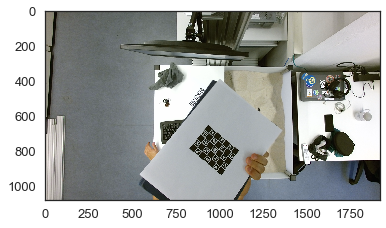

In [44]:
plt.imshow(images[60])

In [22]:
def read_chessboards(images):
    """
    Charuco base pose estimation.
    """
    print("POSE ESTIMATION STARTS:")
    allCorners = []
    allIds = []
    decimator = 0
    # SUB PIXEL CORNER DETECTION CRITERION
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.00001)

    for im in images:
        print("=> Processing image {0}".format(im))
        
        gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        corners, ids, rejectedImgPoints = cv2.aruco.detectMarkers(gray, aruco_dict)

        if len(corners)>0:
            # SUB PIXEL DETECTION
            for corner in corners:
                cv2.cornerSubPix(gray, corner,
                                 winSize = (3,3),
                                 zeroZone = (-1,-1),
                                 criteria = criteria)
            res2 = cv2.aruco.interpolateCornersCharuco(corners,ids,gray,board)
            if res2[1] is not None and res2[2] is not None and len(res2[1])>3 and decimator%1==0:
                allCorners.append(res2[1])
                allIds.append(res2[2])

        decimator+=1

    imsize = gray.shape
    return allCorners,allIds,imsize

In [23]:
%%time
allCorners,allIds,imsize=read_chessboards(images)

POSE ESTIMATION STARTS:
=> Processing image [[[141 133 116]
  [141 133 116]
  [140 134 117]
  ...
  [215 208 209]
  [214 207 208]
  [207 200 201]]

 [[142 134 117]
  [141 133 116]
  [140 134 117]
  ...
  [215 208 209]
  [214 207 208]
  [208 201 202]]

 [[143 135 118]
  [143 135 118]
  [143 135 118]
  ...
  [215 207 208]
  [214 206 207]
  [212 204 205]]

 ...

 [[213 202 197]
  [211 200 195]
  [206 196 189]
  ...
  [ 85  96 111]
  [ 83  94 109]
  [ 79  90 105]]

 [[212 201 196]
  [209 198 193]
  [205 195 188]
  ...
  [ 84  95 110]
  [ 83  94 109]
  [ 79  90 105]]

 [[213 202 197]
  [210 199 194]
  [205 195 188]
  ...
  [ 82  93 108]
  [ 83  94 109]
  [ 80  91 106]]]
=> Processing image [[[138 131 118]
  [138 131 118]
  [139 132 119]
  ...
  [212 205 208]
  [212 205 206]
  [211 204 205]]

 [[139 132 119]
  [139 132 119]
  [140 133 120]
  ...
  [213 206 209]
  [212 205 206]
  [209 202 203]]

 [[140 132 116]
  [141 133 117]
  [141 133 117]
  ...
  [214 207 210]
  [212 205 208]
  [209 202 2

  [ 81  93 110]]]
=> Processing image [[[140 132 116]
  [141 133 117]
  [143 135 119]
  ...
  [212 205 206]
  [212 205 206]
  [210 203 204]]

 [[141 133 117]
  [142 134 118]
  [144 136 120]
  ...
  [216 209 210]
  [212 205 206]
  [208 201 202]]

 [[143 135 118]
  [143 135 118]
  [141 133 116]
  ...
  [216 209 212]
  [212 205 206]
  [209 202 203]]

 ...

 [[210 201 190]
  [208 199 188]
  [205 196 183]
  ...
  [ 80  92 109]
  [ 77  89 106]
  [ 75  87 104]]

 [[209 200 189]
  [208 199 188]
  [205 196 183]
  ...
  [ 83  93 110]
  [ 80  90 107]
  [ 76  86 103]]

 [[210 201 190]
  [207 198 187]
  [204 195 182]
  ...
  [ 81  91 108]
  [ 81  91 108]
  [ 79  89 106]]]
=> Processing image [[[142 135 122]
  [144 137 124]
  [142 135 122]
  ...
  [214 207 210]
  [210 203 204]
  [205 198 199]]

 [[140 133 120]
  [142 135 122]
  [142 135 122]
  ...
  [214 207 210]
  [210 203 204]
  [206 199 200]]

 [[141 132 119]
  [140 131 118]
  [142 133 120]
  ...
  [213 206 209]
  [212 205 206]
  [210 203 204]]



  [ 76  87 102]]]
=> Processing image [[[138 132 115]
  [139 133 116]
  [142 134 118]
  ...
  [211 204 205]
  [212 206 204]
  [208 202 200]]

 [[138 132 115]
  [138 132 115]
  [141 133 117]
  ...
  [214 207 208]
  [212 206 204]
  [208 202 200]]

 [[139 131 114]
  [139 131 114]
  [139 131 114]
  ...
  [213 206 207]
  [210 203 204]
  [207 200 201]]

 ...

 [[210 200 191]
  [207 197 188]
  [203 194 183]
  ...
  [ 75  89 106]
  [ 76  88 105]
  [ 74  86 103]]

 [[209 199 190]
  [206 196 187]
  [201 192 181]
  ...
  [ 75  89 106]
  [ 77  89 106]
  [ 76  88 105]]

 [[210 200 191]
  [207 197 188]
  [200 191 180]
  ...
  [ 75  89 106]
  [ 76  88 105]
  [ 76  88 105]]]
=> Processing image [[[136 130 113]
  [140 134 117]
  [141 135 118]
  ...
  [210 204 202]
  [212 205 206]
  [209 202 203]]

 [[137 131 114]
  [140 134 117]
  [140 134 117]
  ...
  [210 204 202]
  [210 203 204]
  [207 200 201]]

 [[141 133 116]
  [140 132 115]
  [137 131 114]
  ...
  [211 205 203]
  [208 201 202]
  [207 200 201]]



  [ 85  99 116]]]
=> Processing image [[[146 140 124]
  [148 142 126]
  [147 143 129]
  ...
  [220 214 212]
  [220 214 212]
  [217 211 209]]

 [[147 141 125]
  [147 141 125]
  [147 143 129]
  ...
  [222 216 214]
  [220 214 212]
  [215 209 207]]

 [[147 143 127]
  [146 142 126]
  [146 142 128]
  ...
  [222 216 214]
  [218 212 210]
  [215 209 207]]

 ...

 [[218 210 201]
  [216 208 199]
  [212 204 195]
  ...
  [ 85  99 119]
  [ 83  97 116]
  [ 84  98 117]]

 [[217 209 200]
  [214 206 197]
  [211 204 193]
  ...
  [ 83  97 117]
  [ 83  97 117]
  [ 83  97 117]]

 [[216 208 199]
  [215 207 198]
  [210 203 192]
  ...
  [ 84  98 118]
  [ 85  99 119]
  [ 80  94 114]]]
=> Processing image [[[150 144 128]
  [151 145 129]
  [153 147 131]
  ...
  [223 216 217]
  [222 215 216]
  [219 212 213]]

 [[150 144 128]
  [151 145 129]
  [152 146 130]
  ...
  [225 218 219]
  [223 216 217]
  [217 210 211]]

 [[151 145 129]
  [150 144 128]
  [149 143 127]
  ...
  [225 218 221]
  [223 216 217]
  [219 212 213]]



  [ 82  96 113]]]
=> Processing image [[[149 142 131]
  [148 141 130]
  [149 141 132]
  ...
  [222 215 216]
  [224 217 218]
  [221 214 215]]

 [[149 142 131]
  [149 142 131]
  [150 142 133]
  ...
  [225 218 219]
  [224 217 218]
  [219 212 213]]

 [[149 142 129]
  [149 142 129]
  [150 143 132]
  ...
  [224 217 220]
  [223 216 219]
  [218 211 214]]

 ...

 [[223 213 204]
  [220 210 201]
  [214 206 197]
  ...
  [ 86 100 117]
  [ 86 100 117]
  [ 87 101 118]]

 [[220 212 205]
  [218 210 203]
  [213 205 196]
  ...
  [ 86 100 117]
  [ 86 100 117]
  [ 86 100 117]]

 [[219 211 204]
  [215 207 200]
  [212 204 195]
  ...
  [ 84  98 115]
  [ 84  98 115]
  [ 84  98 115]]]
=> Processing image [[[150 142 126]
  [149 141 125]
  [150 142 126]
  ...
  [218 212 210]
  [218 212 210]
  [217 211 209]]

 [[150 142 126]
  [149 141 125]
  [149 141 125]
  ...
  [221 215 213]
  [219 213 211]
  [216 210 208]]

 [[150 142 125]
  [148 140 123]
  [148 140 123]
  ...
  [222 215 216]
  [220 214 212]
  [216 210 208]]



  [ 84  99 114]]]
=> Processing image [[[144 139 128]
  [144 139 128]
  [147 140 129]
  ...
  [217 211 209]
  [216 210 208]
  [211 205 203]]

 [[143 138 127]
  [142 137 126]
  [145 138 127]
  ...
  [219 213 211]
  [216 210 208]
  [212 206 204]]

 [[147 140 129]
  [145 138 127]
  [144 137 126]
  ...
  [219 212 213]
  [217 210 211]
  [215 208 209]]

 ...

 [[216 208 201]
  [215 207 200]
  [211 203 194]
  ...
  [ 83  97 117]
  [ 84  95 116]
  [ 86  97 118]]

 [[215 207 198]
  [214 206 197]
  [210 203 192]
  ...
  [ 85  96 117]
  [ 83  94 115]
  [ 82  93 114]]

 [[214 206 197]
  [213 205 196]
  [209 202 191]
  ...
  [ 82  93 114]
  [ 83  94 115]
  [ 81  92 113]]]
=> Processing image [[[147 140 127]
  [147 140 127]
  [148 141 128]
  ...
  [219 212 213]
  [218 211 212]
  [214 207 208]]

 [[146 139 126]
  [146 139 126]
  [147 140 127]
  ...
  [219 212 213]
  [217 210 211]
  [212 205 206]]

 [[148 142 126]
  [148 142 126]
  [146 139 126]
  ...
  [218 211 212]
  [216 209 210]
  [213 206 207]]



  [ 79  91 108]]]
=> Processing image [[[142 136 119]
  [143 137 120]
  [143 137 120]
  ...
  [212 205 206]
  [212 205 206]
  [207 200 201]]

 [[142 136 119]
  [142 136 119]
  [142 136 119]
  ...
  [213 206 207]
  [210 203 204]
  [205 198 199]]

 [[139 133 116]
  [139 133 116]
  [140 134 117]
  ...
  [213 206 207]
  [209 202 203]
  [205 198 199]]

 ...

 [[212 202 193]
  [209 199 190]
  [203 195 186]
  ...
  [ 78  92 109]
  [ 76  88 105]
  [ 76  88 105]]

 [[212 202 193]
  [208 198 189]
  [201 193 184]
  ...
  [ 78  90 107]
  [ 78  89 104]
  [ 78  89 104]]

 [[211 201 192]
  [209 199 190]
  [202 194 185]
  ...
  [ 77  89 106]
  [ 77  88 103]
  [ 78  89 104]]]
=> Processing image [[[139 133 117]
  [139 133 117]
  [140 134 118]
  ...
  [210 203 204]
  [211 204 205]
  [207 200 201]]

 [[139 133 117]
  [138 132 116]
  [141 135 119]
  ...
  [212 205 206]
  [211 204 205]
  [206 199 200]]

 [[140 133 120]
  [139 132 119]
  [141 134 121]
  ...
  [212 205 208]
  [210 203 204]
  [208 201 202]]



  [ 75  87 104]]]
=> Processing image [[[140 134 117]
  [138 132 115]
  [139 132 112]
  ...
  [206 200 198]
  [209 203 201]
  [207 201 199]]

 [[140 134 117]
  [138 132 115]
  [139 132 112]
  ...
  [209 203 201]
  [207 201 199]
  [204 198 196]]

 [[140 132 115]
  [139 131 114]
  [138 130 113]
  ...
  [208 201 202]
  [205 199 197]
  [203 197 195]]

 ...

 [[207 198 187]
  [205 196 185]
  [203 194 181]
  ...
  [ 80  92 109]
  [ 79  89 106]
  [ 77  87 104]]

 [[207 198 187]
  [206 197 186]
  [201 194 181]
  ...
  [ 79  91 108]
  [ 79  89 106]
  [ 77  87 104]]

 [[207 198 187]
  [205 196 185]
  [200 193 180]
  ...
  [ 76  88 105]
  [ 77  87 104]
  [ 77  87 104]]]
=> Processing image [[[140 133 120]
  [139 132 119]
  [139 132 119]
  ...
  [208 201 202]
  [209 202 203]
  [205 198 199]]

 [[141 134 121]
  [140 133 120]
  [139 132 119]
  ...
  [210 203 204]
  [207 200 201]
  [202 195 196]]

 [[139 132 119]
  [138 131 118]
  [140 131 118]
  ...
  [209 202 203]
  [206 199 200]
  [202 195 196]]



  [ 79  90 105]]]
=> Processing image [[[143 135 118]
  [142 134 117]
  [142 134 117]
  ...
  [211 204 205]
  [212 205 206]
  [211 204 205]]

 [[144 136 119]
  [144 136 119]
  [145 137 120]
  ...
  [213 206 207]
  [213 206 207]
  [208 201 202]]

 [[146 138 122]
  [146 138 122]
  [144 136 119]
  ...
  [215 208 209]
  [213 206 207]
  [207 200 201]]

 ...

 [[214 206 199]
  [211 203 196]
  [205 197 188]
  ...
  [ 84  94 111]
  [ 80  90 107]
  [ 80  90 107]]

 [[215 205 196]
  [212 202 193]
  [204 196 187]
  ...
  [ 81  93 110]
  [ 80  90 107]
  [ 80  90 107]]

 [[215 205 196]
  [212 202 193]
  [205 197 188]
  ...
  [ 81  93 110]
  [ 83  93 110]
  [ 81  91 108]]]
=> Processing image [[[145 139 123]
  [145 139 123]
  [144 137 124]
  ...
  [211 204 205]
  [212 205 206]
  [210 203 204]]

 [[145 139 123]
  [144 138 122]
  [143 136 123]
  ...
  [215 208 209]
  [214 207 208]
  [208 201 202]]

 [[144 138 121]
  [143 137 120]
  [143 137 121]
  ...
  [216 209 210]
  [214 207 208]
  [209 202 203]]



  [ 75  89 106]]]
=> Processing image [[[140 131 118]
  [141 132 119]
  [142 133 122]
  ...
  [209 202 203]
  [209 203 201]
  [204 198 196]]

 [[138 129 116]
  [140 131 118]
  [143 134 123]
  ...
  [211 204 205]
  [207 201 199]
  [203 197 195]]

 [[135 128 115]
  [136 129 116]
  [139 132 121]
  ...
  [211 204 205]
  [208 201 202]
  [207 200 201]]

 ...

 [[212 202 195]
  [209 199 192]
  [205 195 186]
  ...
  [ 78  93 108]
  [ 77  90 105]
  [ 75  88 103]]

 [[211 201 192]
  [210 200 191]
  [205 195 186]
  ...
  [ 80  92 109]
  [ 77  90 105]
  [ 76  89 104]]

 [[211 201 192]
  [209 199 190]
  [204 194 185]
  ...
  [ 79  91 108]
  [ 75  88 103]
  [ 79  92 107]]]
=> Processing image [[[142 134 117]
  [142 134 117]
  [139 133 116]
  ...
  [210 203 204]
  [210 204 202]
  [205 199 197]]

 [[143 135 118]
  [143 135 118]
  [140 134 117]
  ...
  [211 204 205]
  [209 203 201]
  [203 197 195]]

 [[141 133 116]
  [141 133 116]
  [141 133 116]
  ...
  [211 204 205]
  [209 202 203]
  [206 199 200]]



  [ 77  89 106]]]
=> Processing image [[[143 132 111]
  [142 131 110]
  [140 130 111]
  ...
  [210 203 204]
  [209 202 203]
  [205 198 199]]

 [[144 133 112]
  [142 131 110]
  [138 128 109]
  ...
  [211 204 205]
  [209 202 203]
  [205 198 199]]

 [[139 129 110]
  [138 128 109]
  [139 129 110]
  ...
  [210 203 204]
  [208 201 202]
  [207 200 201]]

 ...

 [[209 199 190]
  [207 197 188]
  [203 194 183]
  ...
  [ 79  92 107]
  [ 78  91 104]
  [ 79  92 105]]

 [[208 198 189]
  [207 197 188]
  [202 193 182]
  ...
  [ 76  89 104]
  [ 77  90 103]
  [ 79  92 105]]

 [[208 198 189]
  [206 196 187]
  [202 193 182]
  ...
  [ 75  88 103]
  [ 76  89 102]
  [ 77  90 103]]]
=> Processing image [[[142 136 120]
  [141 135 119]
  [140 133 120]
  ...
  [211 204 205]
  [209 202 203]
  [204 197 198]]

 [[141 135 119]
  [142 136 120]
  [140 133 120]
  ...
  [210 203 204]
  [208 201 202]
  [204 197 198]]

 [[139 131 114]
  [140 132 115]
  [137 131 115]
  ...
  [211 204 205]
  [209 202 203]
  [206 199 200]]



  [ 79  90 103]]]
=> Processing image [[[137 130 117]
  [137 130 117]
  [137 130 117]
  ...
  [211 204 207]
  [211 204 207]
  [209 202 205]]

 [[138 131 118]
  [137 130 117]
  [136 129 116]
  ...
  [214 207 210]
  [211 204 207]
  [207 200 203]]

 [[139 132 121]
  [139 132 121]
  [138 131 118]
  ...
  [214 207 210]
  [210 203 206]
  [204 197 200]]

 ...

 [[209 199 192]
  [206 196 189]
  [202 192 183]
  ...
  [ 81  92 105]
  [ 80  92 102]
  [ 78  90 100]]

 [[208 198 191]
  [206 196 189]
  [202 192 183]
  ...
  [ 81  92 105]
  [ 79  91 101]
  [ 77  89  99]]

 [[208 198 191]
  [206 196 189]
  [202 192 183]
  ...
  [ 79  90 103]
  [ 78  90 100]
  [ 77  89  99]]]
=> Processing image [[[138 132 116]
  [138 132 116]
  [135 129 112]
  ...
  [210 203 206]
  [210 203 204]
  [207 200 201]]

 [[139 133 117]
  [138 132 116]
  [136 130 113]
  ...
  [211 204 207]
  [209 202 203]
  [204 197 198]]

 [[141 133 116]
  [138 130 113]
  [137 129 112]
  ...
  [212 205 208]
  [209 202 203]
  [205 198 199]]



In [ ]:
def calibrate_camera(allCorners,allIds,imsize):
    """
    Calibrates the camera using the dected corners.
    """
    print("CAMERA CALIBRATION")

    cameraMatrixInit = np.array([[ 1000.,    0., imsize[0]/2.],
                                 [    0., 1000., imsize[1]/2.],
                                 [    0.,    0.,           1.]])

    distCoeffsInit = np.zeros((5,1))
    #flags = (cv2.CALIB_USE_INTRINSIC_GUESS + cv2.CALIB_RATIONAL_MODEL + cv2.CALIB_FIX_ASPECT_RATIO)
    #flags = (cv2.CALIB_RATIONAL_MODEL)
    retval, cameraMatrix, distCoeffs, rvecs, tvecs = cv2.aruco.calibrateCameraAruco(
        corners=allCorners,
        ids=allIds,
        counter = allIds.shape,
        board=board,
        imageSize=imsize,
        cameraMatrix=cameraMatrixInit,
        distCoeffs=distCoeffsInit)
         #flags=flags)
     #stdDeviationsIntrinsics, stdDeviationsExtrinsics,
     #perViewErrors) 
                      #criteria=(cv2.TERM_CRITERIA_EPS & cv2.TERM_CRITERIA_COUNT, 10000, 1e-9))

    return retval, cameraMatrix, distCoeffs, rvecs, tvecs

In [ ]:
retval, cameraMatrix, distCoeffs, rvecs, tvecs = calibrate_camera(allCorners,allIds,imsize)

In [ ]:
cv2.calibrateCamera()

In [ ]:
cv2.TERM_CRITERIA_COUNT

In [ ]:
cv2.TERM_CRITERIA_EPS

In [24]:
def read_chessboards(images):
    """
    Charuco base pose estimation.
    """
    print("POSE ESTIMATION STARTS:")
    allCorners = []
    allIds = []
    decimator = 0
    aruco_dict = aruco.Dictionary_get(aruco.DICT_4X4_50)
    for im in images:
        print("=> Processing image {0}".format(im))
        #frame = cv2.imread(im)
        gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        res = cv2.aruco.detectMarkers(gray, aruco_dict)

        if len(res[0])>0:
            res2 = cv2.aruco.interpolateCornersCharuco(res[0],res[1],gray,board)
            if res2[1] is not None and res2[2] is not None and len(res2[1])>3 and decimator%1==0:
                allCorners.append(res2[1])
                allIds.append(res2[2])

        decimator+=1

    imsize = gray.shape
    return allCorners,allIds,imsize
    print("finished")

In [25]:
%%time
allCorners,allIds,imsize=read_chessboards(images)

POSE ESTIMATION STARTS:
=> Processing image [[[141 133 116]
  [141 133 116]
  [140 134 117]
  ...
  [215 208 209]
  [214 207 208]
  [207 200 201]]

 [[142 134 117]
  [141 133 116]
  [140 134 117]
  ...
  [215 208 209]
  [214 207 208]
  [208 201 202]]

 [[143 135 118]
  [143 135 118]
  [143 135 118]
  ...
  [215 207 208]
  [214 206 207]
  [212 204 205]]

 ...

 [[213 202 197]
  [211 200 195]
  [206 196 189]
  ...
  [ 85  96 111]
  [ 83  94 109]
  [ 79  90 105]]

 [[212 201 196]
  [209 198 193]
  [205 195 188]
  ...
  [ 84  95 110]
  [ 83  94 109]
  [ 79  90 105]]

 [[213 202 197]
  [210 199 194]
  [205 195 188]
  ...
  [ 82  93 108]
  [ 83  94 109]
  [ 80  91 106]]]
=> Processing image [[[138 131 118]
  [138 131 118]
  [139 132 119]
  ...
  [212 205 208]
  [212 205 206]
  [211 204 205]]

 [[139 132 119]
  [139 132 119]
  [140 133 120]
  ...
  [213 206 209]
  [212 205 206]
  [209 202 203]]

 [[140 132 116]
  [141 133 117]
  [141 133 117]
  ...
  [214 207 210]
  [212 205 208]
  [209 202 2

  [ 81  93 110]]]
=> Processing image [[[140 132 116]
  [141 133 117]
  [143 135 119]
  ...
  [212 205 206]
  [212 205 206]
  [210 203 204]]

 [[141 133 117]
  [142 134 118]
  [144 136 120]
  ...
  [216 209 210]
  [212 205 206]
  [208 201 202]]

 [[143 135 118]
  [143 135 118]
  [141 133 116]
  ...
  [216 209 212]
  [212 205 206]
  [209 202 203]]

 ...

 [[210 201 190]
  [208 199 188]
  [205 196 183]
  ...
  [ 80  92 109]
  [ 77  89 106]
  [ 75  87 104]]

 [[209 200 189]
  [208 199 188]
  [205 196 183]
  ...
  [ 83  93 110]
  [ 80  90 107]
  [ 76  86 103]]

 [[210 201 190]
  [207 198 187]
  [204 195 182]
  ...
  [ 81  91 108]
  [ 81  91 108]
  [ 79  89 106]]]
=> Processing image [[[142 135 122]
  [144 137 124]
  [142 135 122]
  ...
  [214 207 210]
  [210 203 204]
  [205 198 199]]

 [[140 133 120]
  [142 135 122]
  [142 135 122]
  ...
  [214 207 210]
  [210 203 204]
  [206 199 200]]

 [[141 132 119]
  [140 131 118]
  [142 133 120]
  ...
  [213 206 209]
  [212 205 206]
  [210 203 204]]



  [ 76  87 102]]]
=> Processing image [[[138 132 115]
  [139 133 116]
  [142 134 118]
  ...
  [211 204 205]
  [212 206 204]
  [208 202 200]]

 [[138 132 115]
  [138 132 115]
  [141 133 117]
  ...
  [214 207 208]
  [212 206 204]
  [208 202 200]]

 [[139 131 114]
  [139 131 114]
  [139 131 114]
  ...
  [213 206 207]
  [210 203 204]
  [207 200 201]]

 ...

 [[210 200 191]
  [207 197 188]
  [203 194 183]
  ...
  [ 75  89 106]
  [ 76  88 105]
  [ 74  86 103]]

 [[209 199 190]
  [206 196 187]
  [201 192 181]
  ...
  [ 75  89 106]
  [ 77  89 106]
  [ 76  88 105]]

 [[210 200 191]
  [207 197 188]
  [200 191 180]
  ...
  [ 75  89 106]
  [ 76  88 105]
  [ 76  88 105]]]
=> Processing image [[[136 130 113]
  [140 134 117]
  [141 135 118]
  ...
  [210 204 202]
  [212 205 206]
  [209 202 203]]

 [[137 131 114]
  [140 134 117]
  [140 134 117]
  ...
  [210 204 202]
  [210 203 204]
  [207 200 201]]

 [[141 133 116]
  [140 132 115]
  [137 131 114]
  ...
  [211 205 203]
  [208 201 202]
  [207 200 201]]



  [ 85  99 116]]]
=> Processing image [[[146 140 124]
  [148 142 126]
  [147 143 129]
  ...
  [220 214 212]
  [220 214 212]
  [217 211 209]]

 [[147 141 125]
  [147 141 125]
  [147 143 129]
  ...
  [222 216 214]
  [220 214 212]
  [215 209 207]]

 [[147 143 127]
  [146 142 126]
  [146 142 128]
  ...
  [222 216 214]
  [218 212 210]
  [215 209 207]]

 ...

 [[218 210 201]
  [216 208 199]
  [212 204 195]
  ...
  [ 85  99 119]
  [ 83  97 116]
  [ 84  98 117]]

 [[217 209 200]
  [214 206 197]
  [211 204 193]
  ...
  [ 83  97 117]
  [ 83  97 117]
  [ 83  97 117]]

 [[216 208 199]
  [215 207 198]
  [210 203 192]
  ...
  [ 84  98 118]
  [ 85  99 119]
  [ 80  94 114]]]
=> Processing image [[[150 144 128]
  [151 145 129]
  [153 147 131]
  ...
  [223 216 217]
  [222 215 216]
  [219 212 213]]

 [[150 144 128]
  [151 145 129]
  [152 146 130]
  ...
  [225 218 219]
  [223 216 217]
  [217 210 211]]

 [[151 145 129]
  [150 144 128]
  [149 143 127]
  ...
  [225 218 221]
  [223 216 217]
  [219 212 213]]



  [ 82  96 113]]]
=> Processing image [[[149 142 131]
  [148 141 130]
  [149 141 132]
  ...
  [222 215 216]
  [224 217 218]
  [221 214 215]]

 [[149 142 131]
  [149 142 131]
  [150 142 133]
  ...
  [225 218 219]
  [224 217 218]
  [219 212 213]]

 [[149 142 129]
  [149 142 129]
  [150 143 132]
  ...
  [224 217 220]
  [223 216 219]
  [218 211 214]]

 ...

 [[223 213 204]
  [220 210 201]
  [214 206 197]
  ...
  [ 86 100 117]
  [ 86 100 117]
  [ 87 101 118]]

 [[220 212 205]
  [218 210 203]
  [213 205 196]
  ...
  [ 86 100 117]
  [ 86 100 117]
  [ 86 100 117]]

 [[219 211 204]
  [215 207 200]
  [212 204 195]
  ...
  [ 84  98 115]
  [ 84  98 115]
  [ 84  98 115]]]
=> Processing image [[[150 142 126]
  [149 141 125]
  [150 142 126]
  ...
  [218 212 210]
  [218 212 210]
  [217 211 209]]

 [[150 142 126]
  [149 141 125]
  [149 141 125]
  ...
  [221 215 213]
  [219 213 211]
  [216 210 208]]

 [[150 142 125]
  [148 140 123]
  [148 140 123]
  ...
  [222 215 216]
  [220 214 212]
  [216 210 208]]



  [ 84  99 114]]]
=> Processing image [[[144 139 128]
  [144 139 128]
  [147 140 129]
  ...
  [217 211 209]
  [216 210 208]
  [211 205 203]]

 [[143 138 127]
  [142 137 126]
  [145 138 127]
  ...
  [219 213 211]
  [216 210 208]
  [212 206 204]]

 [[147 140 129]
  [145 138 127]
  [144 137 126]
  ...
  [219 212 213]
  [217 210 211]
  [215 208 209]]

 ...

 [[216 208 201]
  [215 207 200]
  [211 203 194]
  ...
  [ 83  97 117]
  [ 84  95 116]
  [ 86  97 118]]

 [[215 207 198]
  [214 206 197]
  [210 203 192]
  ...
  [ 85  96 117]
  [ 83  94 115]
  [ 82  93 114]]

 [[214 206 197]
  [213 205 196]
  [209 202 191]
  ...
  [ 82  93 114]
  [ 83  94 115]
  [ 81  92 113]]]
=> Processing image [[[147 140 127]
  [147 140 127]
  [148 141 128]
  ...
  [219 212 213]
  [218 211 212]
  [214 207 208]]

 [[146 139 126]
  [146 139 126]
  [147 140 127]
  ...
  [219 212 213]
  [217 210 211]
  [212 205 206]]

 [[148 142 126]
  [148 142 126]
  [146 139 126]
  ...
  [218 211 212]
  [216 209 210]
  [213 206 207]]



  [ 79  91 108]]]
=> Processing image [[[142 136 119]
  [143 137 120]
  [143 137 120]
  ...
  [212 205 206]
  [212 205 206]
  [207 200 201]]

 [[142 136 119]
  [142 136 119]
  [142 136 119]
  ...
  [213 206 207]
  [210 203 204]
  [205 198 199]]

 [[139 133 116]
  [139 133 116]
  [140 134 117]
  ...
  [213 206 207]
  [209 202 203]
  [205 198 199]]

 ...

 [[212 202 193]
  [209 199 190]
  [203 195 186]
  ...
  [ 78  92 109]
  [ 76  88 105]
  [ 76  88 105]]

 [[212 202 193]
  [208 198 189]
  [201 193 184]
  ...
  [ 78  90 107]
  [ 78  89 104]
  [ 78  89 104]]

 [[211 201 192]
  [209 199 190]
  [202 194 185]
  ...
  [ 77  89 106]
  [ 77  88 103]
  [ 78  89 104]]]
=> Processing image [[[139 133 117]
  [139 133 117]
  [140 134 118]
  ...
  [210 203 204]
  [211 204 205]
  [207 200 201]]

 [[139 133 117]
  [138 132 116]
  [141 135 119]
  ...
  [212 205 206]
  [211 204 205]
  [206 199 200]]

 [[140 133 120]
  [139 132 119]
  [141 134 121]
  ...
  [212 205 208]
  [210 203 204]
  [208 201 202]]



  [ 75  87 104]]]
=> Processing image [[[140 134 117]
  [138 132 115]
  [139 132 112]
  ...
  [206 200 198]
  [209 203 201]
  [207 201 199]]

 [[140 134 117]
  [138 132 115]
  [139 132 112]
  ...
  [209 203 201]
  [207 201 199]
  [204 198 196]]

 [[140 132 115]
  [139 131 114]
  [138 130 113]
  ...
  [208 201 202]
  [205 199 197]
  [203 197 195]]

 ...

 [[207 198 187]
  [205 196 185]
  [203 194 181]
  ...
  [ 80  92 109]
  [ 79  89 106]
  [ 77  87 104]]

 [[207 198 187]
  [206 197 186]
  [201 194 181]
  ...
  [ 79  91 108]
  [ 79  89 106]
  [ 77  87 104]]

 [[207 198 187]
  [205 196 185]
  [200 193 180]
  ...
  [ 76  88 105]
  [ 77  87 104]
  [ 77  87 104]]]
=> Processing image [[[140 133 120]
  [139 132 119]
  [139 132 119]
  ...
  [208 201 202]
  [209 202 203]
  [205 198 199]]

 [[141 134 121]
  [140 133 120]
  [139 132 119]
  ...
  [210 203 204]
  [207 200 201]
  [202 195 196]]

 [[139 132 119]
  [138 131 118]
  [140 131 118]
  ...
  [209 202 203]
  [206 199 200]
  [202 195 196]]



  [ 79  90 105]]]
=> Processing image [[[143 135 118]
  [142 134 117]
  [142 134 117]
  ...
  [211 204 205]
  [212 205 206]
  [211 204 205]]

 [[144 136 119]
  [144 136 119]
  [145 137 120]
  ...
  [213 206 207]
  [213 206 207]
  [208 201 202]]

 [[146 138 122]
  [146 138 122]
  [144 136 119]
  ...
  [215 208 209]
  [213 206 207]
  [207 200 201]]

 ...

 [[214 206 199]
  [211 203 196]
  [205 197 188]
  ...
  [ 84  94 111]
  [ 80  90 107]
  [ 80  90 107]]

 [[215 205 196]
  [212 202 193]
  [204 196 187]
  ...
  [ 81  93 110]
  [ 80  90 107]
  [ 80  90 107]]

 [[215 205 196]
  [212 202 193]
  [205 197 188]
  ...
  [ 81  93 110]
  [ 83  93 110]
  [ 81  91 108]]]
=> Processing image [[[145 139 123]
  [145 139 123]
  [144 137 124]
  ...
  [211 204 205]
  [212 205 206]
  [210 203 204]]

 [[145 139 123]
  [144 138 122]
  [143 136 123]
  ...
  [215 208 209]
  [214 207 208]
  [208 201 202]]

 [[144 138 121]
  [143 137 120]
  [143 137 121]
  ...
  [216 209 210]
  [214 207 208]
  [209 202 203]]



  [ 75  89 106]]]
=> Processing image [[[140 131 118]
  [141 132 119]
  [142 133 122]
  ...
  [209 202 203]
  [209 203 201]
  [204 198 196]]

 [[138 129 116]
  [140 131 118]
  [143 134 123]
  ...
  [211 204 205]
  [207 201 199]
  [203 197 195]]

 [[135 128 115]
  [136 129 116]
  [139 132 121]
  ...
  [211 204 205]
  [208 201 202]
  [207 200 201]]

 ...

 [[212 202 195]
  [209 199 192]
  [205 195 186]
  ...
  [ 78  93 108]
  [ 77  90 105]
  [ 75  88 103]]

 [[211 201 192]
  [210 200 191]
  [205 195 186]
  ...
  [ 80  92 109]
  [ 77  90 105]
  [ 76  89 104]]

 [[211 201 192]
  [209 199 190]
  [204 194 185]
  ...
  [ 79  91 108]
  [ 75  88 103]
  [ 79  92 107]]]
=> Processing image [[[142 134 117]
  [142 134 117]
  [139 133 116]
  ...
  [210 203 204]
  [210 204 202]
  [205 199 197]]

 [[143 135 118]
  [143 135 118]
  [140 134 117]
  ...
  [211 204 205]
  [209 203 201]
  [203 197 195]]

 [[141 133 116]
  [141 133 116]
  [141 133 116]
  ...
  [211 204 205]
  [209 202 203]
  [206 199 200]]



  [ 77  89 106]]]
=> Processing image [[[143 132 111]
  [142 131 110]
  [140 130 111]
  ...
  [210 203 204]
  [209 202 203]
  [205 198 199]]

 [[144 133 112]
  [142 131 110]
  [138 128 109]
  ...
  [211 204 205]
  [209 202 203]
  [205 198 199]]

 [[139 129 110]
  [138 128 109]
  [139 129 110]
  ...
  [210 203 204]
  [208 201 202]
  [207 200 201]]

 ...

 [[209 199 190]
  [207 197 188]
  [203 194 183]
  ...
  [ 79  92 107]
  [ 78  91 104]
  [ 79  92 105]]

 [[208 198 189]
  [207 197 188]
  [202 193 182]
  ...
  [ 76  89 104]
  [ 77  90 103]
  [ 79  92 105]]

 [[208 198 189]
  [206 196 187]
  [202 193 182]
  ...
  [ 75  88 103]
  [ 76  89 102]
  [ 77  90 103]]]
=> Processing image [[[142 136 120]
  [141 135 119]
  [140 133 120]
  ...
  [211 204 205]
  [209 202 203]
  [204 197 198]]

 [[141 135 119]
  [142 136 120]
  [140 133 120]
  ...
  [210 203 204]
  [208 201 202]
  [204 197 198]]

 [[139 131 114]
  [140 132 115]
  [137 131 115]
  ...
  [211 204 205]
  [209 202 203]
  [206 199 200]]



  [ 79  90 103]]]
=> Processing image [[[137 130 117]
  [137 130 117]
  [137 130 117]
  ...
  [211 204 207]
  [211 204 207]
  [209 202 205]]

 [[138 131 118]
  [137 130 117]
  [136 129 116]
  ...
  [214 207 210]
  [211 204 207]
  [207 200 203]]

 [[139 132 121]
  [139 132 121]
  [138 131 118]
  ...
  [214 207 210]
  [210 203 206]
  [204 197 200]]

 ...

 [[209 199 192]
  [206 196 189]
  [202 192 183]
  ...
  [ 81  92 105]
  [ 80  92 102]
  [ 78  90 100]]

 [[208 198 191]
  [206 196 189]
  [202 192 183]
  ...
  [ 81  92 105]
  [ 79  91 101]
  [ 77  89  99]]

 [[208 198 191]
  [206 196 189]
  [202 192 183]
  ...
  [ 79  90 103]
  [ 78  90 100]
  [ 77  89  99]]]
=> Processing image [[[138 132 116]
  [138 132 116]
  [135 129 112]
  ...
  [210 203 206]
  [210 203 204]
  [207 200 201]]

 [[139 133 117]
  [138 132 116]
  [136 130 113]
  ...
  [211 204 207]
  [209 202 203]
  [204 197 198]]

 [[141 133 116]
  [138 130 113]
  [137 129 112]
  ...
  [212 205 208]
  [209 202 203]
  [205 198 199]]



In [29]:
def calibrate_camera(allCorners,allIds,imsize):
    """
    Calibrates the camera using the dected corners.
    """
    print("CAMERA CALIBRATION")

    cameraMatrixInit = np.array([[ 2000.,    0., imsize[0]/2.],
                                 [    0., 2000., imsize[1]/2.],
                                 [    0.,    0.,           1.]])

    distCoeffsInit = np.zeros((5,1))
    flags = (cv2.CALIB_USE_INTRINSIC_GUESS + cv2.CALIB_RATIONAL_MODEL)
    (ret, camera_matrix, distortion_coefficients0,
     rotation_vectors, translation_vectors,
     stdDeviationsIntrinsics, stdDeviationsExtrinsics,
     perViewErrors) = cv2.aruco.calibrateCameraCharucoExtended(
                      charucoCorners=allCorners,
                      charucoIds=allIds,
                      board=board,
                      imageSize=imsize,
                      cameraMatrix=cameraMatrixInit,
                      distCoeffs=distCoeffsInit,
                      flags=flags,
                      criteria=(cv2.TERM_CRITERIA_EPS & cv2.TERM_CRITERIA_COUNT, 10000, 1e-9))

    return ret, camera_matrix, distortion_coefficients0, rotation_vectors, translation_vectors
    print("finished")

In [30]:
%%time
ret, mtx, dist, rvecs, tvecs = calibrate_camera(allCorners,allIds,imsize)
ret

CAMERA CALIBRATION


error: OpenCV(4.1.1) C:\projects\opencv-python\opencv\modules\calib3d\src\calibration.cpp:1171: error: (-2:Unspecified error) in function 'void __cdecl cvFindExtrinsicCameraParams2(const struct CvMat *,const struct CvMat *,const struct CvMat *,const struct CvMat *,struct CvMat *,struct CvMat *,int)'
> DLT algorithm needs at least 6 points for pose estimation from 3D-2D point correspondences. (expected: 'count >= 6'), where
>     'count' is 4
> must be greater than or equal to
>     '6' is 6


In [40]:
%%time
# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

#images = glob.glob('calib_images/*.jpg')


for img in images[:4]:
    #img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (7,6),None)

    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)

        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (7,6), corners2,ret)


ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)



error: OpenCV(4.1.1) C:\projects\opencv-python\opencv\modules\calib3d\src\calibration.cpp:3677: error: (-215:Assertion failed) nimages > 0 in function 'cv::calibrateCameraRO'


In [43]:
cv2.CALIB_USE_INTRINSIC_GUESS

1

In [ ]:

# Function to draw the axis
def draw(img, corners, imgpts):
    corner = tuple(corners[0].ravel())
    img = cv2.line(img, corner, tuple(imgpts[0].ravel()), (255, 0, 0), 5)
    img = cv2.line(img, corner, tuple(imgpts[1].ravel()), (0, 255, 0), 5)
    img = cv2.line(img, corner, tuple(imgpts[2].ravel()), (0, 0, 255), 5)
    return img

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)

axis = np.float32([[3,0,0], [0,3,0], [0,0,-3]]).reshape(-1,3)

for fname in glob.glob('calib_images/left03.jpg'):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (7,6),None)

    if ret == True:
        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)

        # Find the rotation and translation vectors.
        _,rvecs, tvecs, inliers = cv2.solvePnPRansac(objp, corners2, mtx, dist)
        # project 3D points to image plane
        imgpts, jac = cv2.projectPoints(axis, rvecs, tvecs, mtx, dist)

        img = draw(img,corners2,imgpts)
        cv2.imshow('img',img)
        k = cv2.waitKey(0) & 0xff

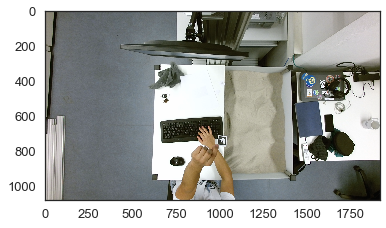

In [87]:
frame = sensor.get_color()
plt.imshow(frame)

In [127]:
%%time

gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
aruco_dict = aruco.Dictionary_get(aruco.DICT_4X4_50)
parameters =  aruco.DetectorParameters_create()
corners, ids, rejectedImgPoints = aruco.detectMarkers(gray, aruco_dict, parameters=parameters)
frame_markers = aruco.drawDetectedMarkers(frame.copy(), corners, ids)

Wall time: 25.9 ms


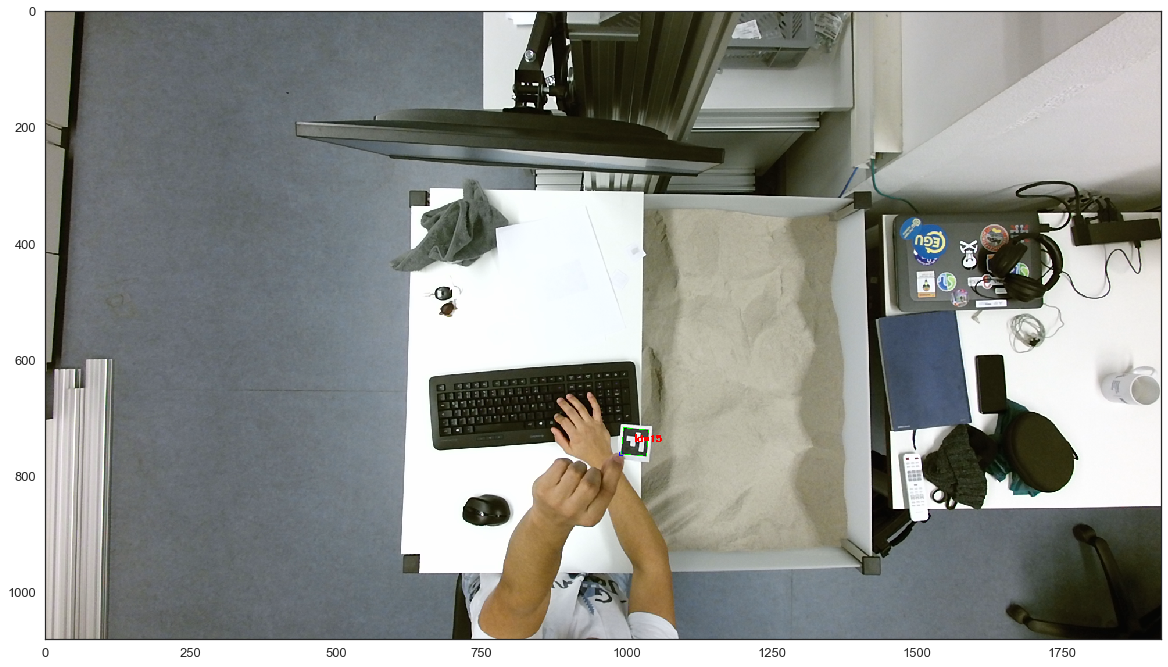

In [128]:
plt.figure(figsize=(20,20))
plt.imshow(frame_markers)

In [129]:
mtx = np.array([[  1.46963466e+03,   0.00000000e+00,   2.63094117e+02],
       [  0.00000000e+00,   1.47297770e+03,   3.19127464e+02],
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00]])
dist=np.array([[ -4.15557150e+00],
               [  8.04563425e+02],
              [  1.72644822e-01],
              [ -4.62914356e-02],
              [ -1.41439828e+04],
              [  4.99936408e+00],
              [ -2.89968864e+02],
              [  1.96691829e+04],
              [  0.00000000e+00],
              [  0.00000000e+00],
              [  0.00000000e+00],
              [  0.00000000e+00],
              [  0.00000000e+00],
              [  0.00000000e+00]])

In [139]:
size_of_marker =  0.02 # side lenght of the marker in meter
rvecs,tvecs, trash = aruco.estimatePoseSingleMarkers(corners, size_of_marker , mtx, dist, rvecs, tvecs)

In [142]:
length_of_axis = 0.1
#imaxis = aruco.drawDetectedMarkers(frame.copy(), corners)
#imaxis = aruco.drawAxis(imaxis, mtx, dist, rvecs, tvecs, length_of_axis)
for i in range(len(tvecs)):
    imaxis = aruco.drawAxis(imaxis, mtx, dist, rvecs[i], tvecs[i], length_of_axis)

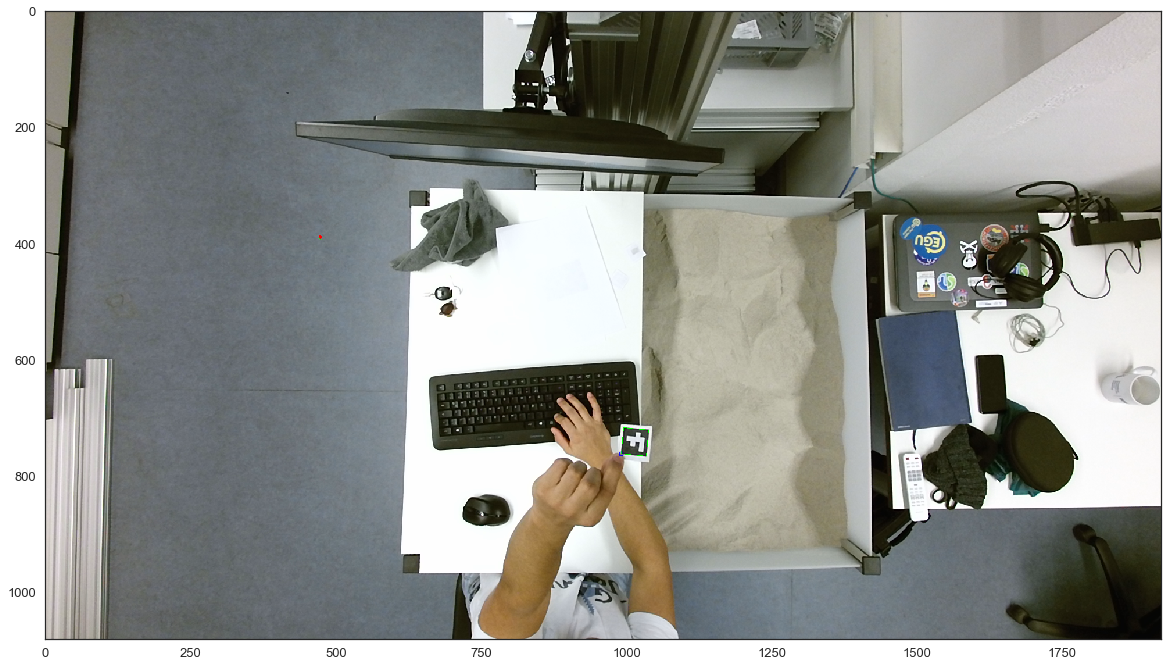

In [143]:
plt.figure(figsize=(20,20))
plt.imshow(imaxis)
plt.show()

In [121]:
rvecs

array([[[ 80.47532293,  62.17775501, -85.46059138]]])

In [120]:
dist

array([[-4.15557150e+00],
       [ 8.04563425e+02],
       [ 1.72644822e-01],
       [-4.62914356e-02],
       [-1.41439828e+04],
       [ 4.99936408e+00],
       [-2.89968864e+02],
       [ 1.96691829e+04],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00]])

In [124]:
rvecs, tvecs, _objPoints = aruco.estimatePoseSingleMarkers( corners, markerLength, cameraMatrix, distCoeffs[, rvecs[, tvecs[, _objPoints]]] ) 

SyntaxError: invalid syntax (<ipython-input-124-3b3e62ca61f8>, line 1)

In [138]:
cv2.VideoCapture(0)

<VideoCapture 0000023403B0C4D0>